In [1]:
# importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
# loading the Iris Dataset

iris_data = pd.DataFrame(pd.read_csv('iris.csv'))
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
# dropping unnecessary columns

iris_data.drop('Id', axis=1, inplace=True)

### Some Exploratory Data Analysis (EDA) with Iris

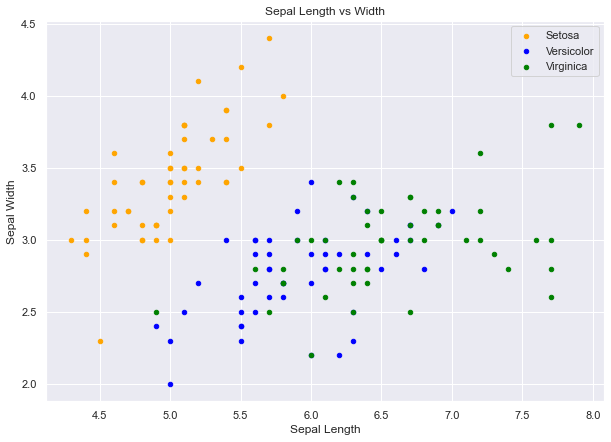

In [5]:
fig = iris_data[iris_data.Species == 'Iris-setosa'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm',
                                                         color='orange', label='Setosa')
iris_data[iris_data.Species == 'Iris-versicolor'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm',
                                                         color='blue', label='Versicolor', ax=fig)
iris_data[iris_data.Species == 'Iris-virginica'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm',
                                                         color='green', label='Virginica', ax=fig)

fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length vs Width')

fig = plt.gcf()
fig.set_size_inches(10,7)
plt.show()

D:\Anaconda\envs\py3-TF2.0\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


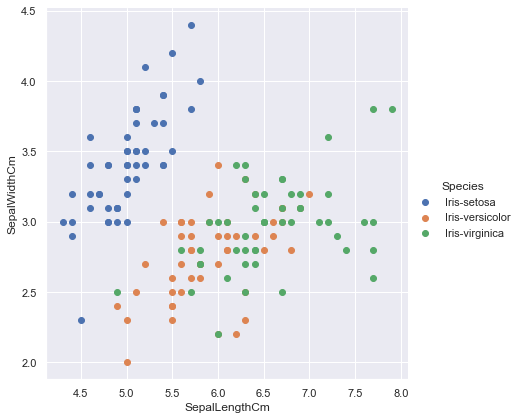

In [6]:
sns.FacetGrid(iris_data, hue='Species', size=6)\
.map(plt.scatter, 'SepalLengthCm', 'SepalWidthCm')\
.add_legend()

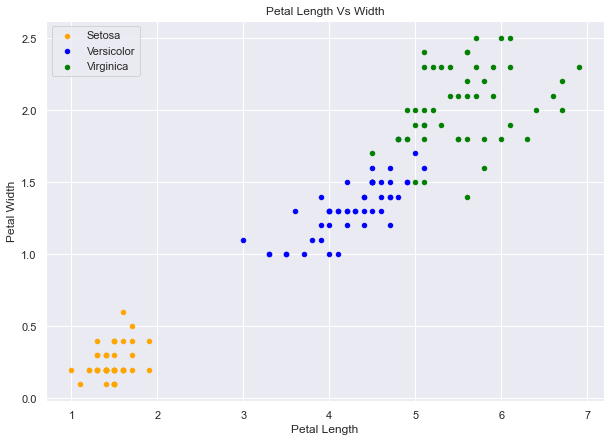

In [7]:
fig = iris_data[iris_data.Species == 'Iris-setosa'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='orange', label='Setosa')
iris_data[iris_data.Species == 'Iris-versicolor'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='blue', label='Versicolor', ax=fig)
iris_data[iris_data.Species == 'Iris-virginica'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='green', label='Virginica', ax=fig)

fig.set_xlabel('Petal Length')
fig.set_ylabel('Petal Width')
fig.set_title('Petal Length Vs Width')

fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

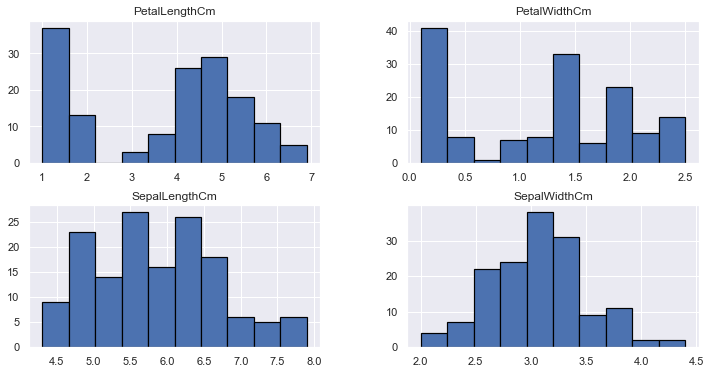

In [8]:
iris_data.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show

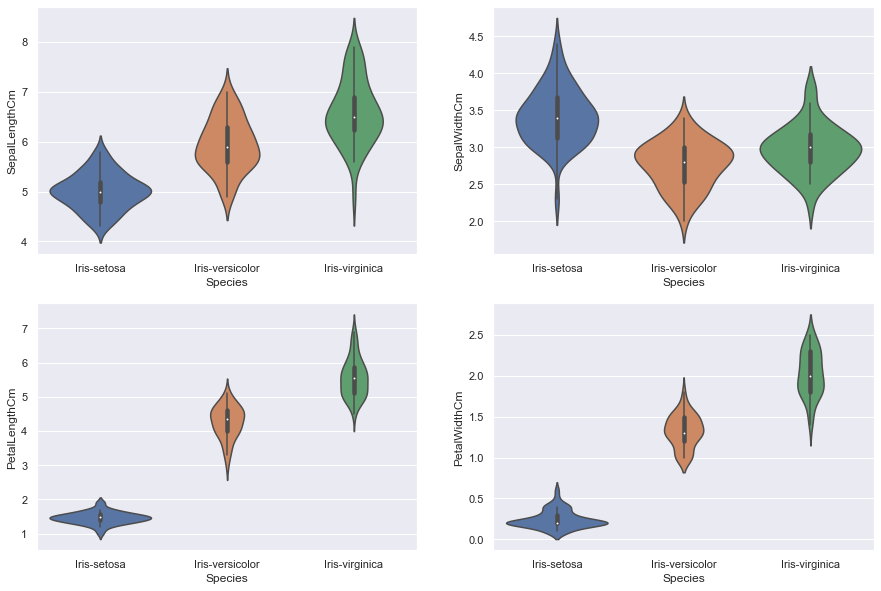

In [9]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species', y='SepalLengthCm', data=iris_data)
plt.subplot(2,2,2)
sns.violinplot(x='Species', y='SepalWidthCm', data=iris_data)

plt.subplot(2,2,3)
sns.violinplot(x='Species', y='PetalLengthCm', data=iris_data)
plt.subplot(2,2,4)
sns.violinplot(x='Species', y='PetalWidthCm', data=iris_data)

In [10]:
# importing Libraries

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [11]:
iris_data.shape

(150, 5)

#### Checking correlation

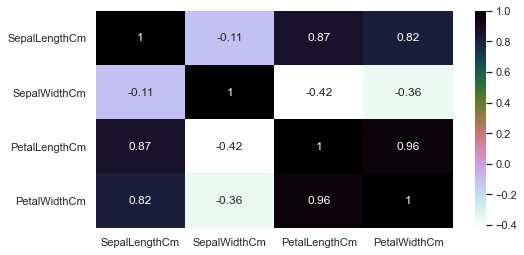

In [12]:
plt.figure(figsize=(8,4))
sns.heatmap(iris_data.corr(), annot=True, cmap='cubehelix_r')
plt.show()

###### The Sepal Width and Length are not correlated. The Petal Width and Length are highly correlated. 
###### So first we'll use all the features for training the algorithms and hence check accuracy of them.
###### After that we'll use 'one petal feature' and 'one sepal feature' and check accuracy of the algorithms.

#### Spliting Data into Train and Test

In [13]:
train, test = train_test_split(iris_data, test_size=0.3, random_state=11)
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [14]:
train_X = train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
train_y = train.Species

test_X = test[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
test_y = test.Species

In [15]:
train_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
98,5.1,2.5,3.0,1.1
58,6.6,2.9,4.6,1.3
35,5.0,3.2,1.2,0.2
130,7.4,2.8,6.1,1.9
46,5.1,3.8,1.6,0.2


In [16]:
train_y.head()

98     Iris-versicolor
58     Iris-versicolor
35         Iris-setosa
130     Iris-virginica
46         Iris-setosa
Name: Species, dtype: object

### SVM

In [17]:
model = svm.SVC()

model.fit(train_X, train_y)

prediction = model.predict(test_X)
print('The accuracy of the SVM is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of the SVM is:  0.9333333333333333


### Logistic Regression

In [18]:
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of Logistic Regression is:  0.9333333333333333


D:\Anaconda\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Decision Tree 

In [19]:
model = DecisionTreeClassifier()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Decision Tree Classifier is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of Decision Tree Classifier is:  0.9111111111111111


### K-Nearest Neighbors

In [20]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of KNeighbours is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of KNeighbours is:  0.9555555555555556


D:\Anaconda\envs\py3-TF2.0\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


([<matplotlib.axis.XTick at 0x2973cf3cb88>,
 <a list of 10 Text major ticklabel objects>)

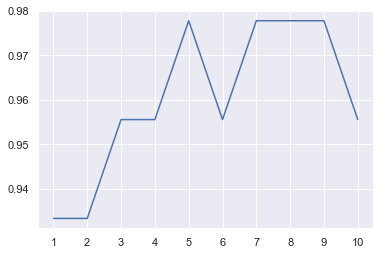

In [21]:
# Checking for different values n_neighbors

a_index = list(range(1,11))
a = pd.Series()
for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_y)))

plt.plot(a_index, a)
x = [1,2,3,4,5,6,7,8,9,10]
plt.xticks(x)

#### Creating Petals and Sepals

In [22]:
petal = iris_data[['PetalLengthCm', 'PetalWidthCm', 'Species']]
sepal = iris_data[['SepalLengthCm', 'SepalWidthCm', 'Species']]

#### For Iris Petal

In [23]:
train_p, test_p = train_test_split(petal, test_size=0.3, random_state=0)
train_x_p = train_p[['PetalLengthCm', 'PetalWidthCm']]
train_y_p = train_p.Species

test_x_p = test_p[['PetalLengthCm', 'PetalWidthCm']]
test_y_p = test_p.Species

#### For Iris Sepal

In [24]:
train_s, test_s = train_test_split(sepal, test_size=0.3, random_state=0)
train_x_s = train_s[['SepalLengthCm', 'SepalWidthCm']]
train_y_s = train_s.Species

test_x_s = test_s[['SepalLengthCm', 'SepalWidthCm']]
test_y_s = test_s.Species

### SVM Algorithm

In [25]:
model = svm.SVC()
model.fit(train_x_p, train_y_p)
prediction = model.predict(test_x_p)
print('The accuracy of the SVM using Petals :', metrics.accuracy_score(prediction, test_y_p))

model = svm.SVC()
model.fit(train_x_s, train_y_s)
prediction = model.predict(test_x_s)
print('The accuracy of the SVM using Sepals :', metrics.accuracy_score(prediction, test_y_s))

The accuracy of the SVM using Petals : 0.9777777777777777
The accuracy of the SVM using Sepals : 0.8


### Logistic Regression Algorithm

In [26]:
model = LogisticRegression()
model.fit(train_x_p, train_y_p)
prediction = model.predict(test_x_p)
print('The accuracy of Logistic Regression using Petals is: ', metrics.accuracy_score(prediction, test_y_p))

model = LogisticRegression()
model.fit(train_x_s, train_y_s)
prediction = model.predict(test_x_s)
print('The accuracy of Logistic Regression using Sepals is: ', metrics.accuracy_score(prediction, test_y_p))

The accuracy of Logistic Regression using Petals is:  0.9777777777777777
The accuracy of Logistic Regression using Sepals is:  0.8222222222222222


### Decision Tree Algorithm

In [27]:
model=DecisionTreeClassifier()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Decision Tree using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Decision Tree using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Decision Tree using Petals is: 0.9555555555555556
The accuracy of the Decision Tree using Sepals is: 0.6444444444444445


### K-Nearest Neighbors Algorithms

In [28]:
model=KNeighborsClassifier(n_neighbors=3) 
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the KNN using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the KNN using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the KNN using Petals is: 0.9777777777777777
The accuracy of the KNN using Sepals is: 0.7333333333333333
